In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

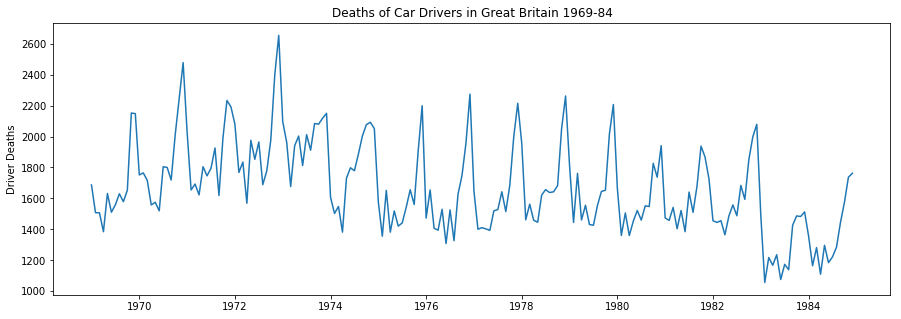

In [2]:
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv')
data.index = data['time']
data['drivers'] = data['value'].values

plt.figure(figsize=(15, 5))
plt.plot(data.index, data['drivers'])
plt.ylabel('Driver Deaths')
plt.title('Deaths of Car Drivers in Great Britain 1969-84')
plt.plot()
data_d = data['drivers']

[]

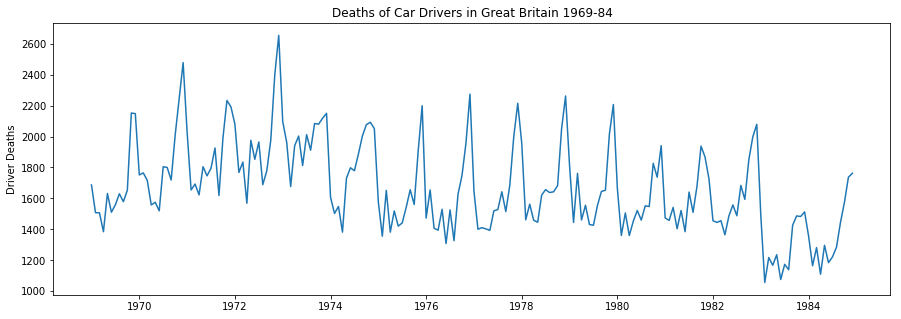

In [3]:
data.loc[(data['time']>=1983.05), 'seat_belt'] = 1;
data.loc[(data['time']<1983.05), 'seat_belt'] = 0;
data.loc[(data['time']>=1974.00), 'oil_crisis'] = 1;
data.loc[(data['time']<1974.00), 'oil_crisis'] = 0;
plt.figure(figsize=(15, 5))
plt.plot(data.index, data['drivers'])
plt.ylabel('Driver Deaths')
plt.title('Deaths of Car Drivers in Great Britain 1969-84')
plt.plot()

In [4]:
model = pf.ARIMAX(data=data, formula='drivers~1+seat_belt+oil_crisis',
                 ar=1, ma=1, family=pf.Normal())
x = model.fit('MLE')
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1297.4978                        
End Date: 1984.91666666667                              AIC: 2606.9955                                    
Number of observations: 191                             BIC: 2626.5092                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9171     0.076      12.0707  0.0      (0.7681 | 1.066)         
MA(1)                                

In [5]:
model = pf.ARIMAX(data=data, formula='drivers~1+seat_belt',
                 ar=1, ma=1, family=pf.Normal())
x = model.fit('MLE')
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1291.5818                        
End Date: 1984.91666666667                              AIC: 2593.1637                                    
Number of observations: 191                             BIC: 2609.4251                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.7904     0.0699     11.3129  0.0      (0.6535 | 0.9274)        
MA(1)                                

In [6]:
model = pf.ARIMAX(data=data, formula='drivers~0+seat_belt',
                 ar=1, ma=1, family=pf.Normal())
x = model.fit('MLE')
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1300.7146                        
End Date: 1984.91666666667                              AIC: 2609.4292                                    
Number of observations: 191                             BIC: 2622.4383                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9922     0.009      110.8395 0.0      (0.9746 | 1.0097)        
MA(1)                                

In [7]:
model = pf.ARIMAX(data=data, formula='drivers~1+oil_crisis',
                 ar=1, ma=1, family=pf.Normal())
x = model.fit('MLE')
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1280.9354                        
End Date: 1984.91666666667                              AIC: 2571.8708                                    
Number of observations: 191                             BIC: 2588.1322                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.5526     0.0854     6.4693   0.0      (0.3852 | 0.72)          
MA(1)                                

In [8]:
model = pf.ARIMAX(data=data, formula='drivers~0+oil_crisis',
                 ar=1, ma=1, family=pf.Normal())
x = model.fit('MLE')
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1300.5625                        
End Date: 1984.91666666667                              AIC: 2609.1251                                    
Number of observations: 191                             BIC: 2622.1342                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9853     0.014      70.4503  0.0      (0.9579 | 1.0127)        
MA(1)                                

In [9]:
model = pf.ARIMAX(data=data, formula='drivers~0+seat_belt+oil_crisis',
                 ar=1, ma=1, family=pf.Normal())
x = model.fit('MLE')
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1300.5332                        
End Date: 1984.91666666667                              AIC: 2611.0664                                    
Number of observations: 191                             BIC: 2627.3278                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9854     0.0141     70.0851  0.0      (0.9578 | 1.0129)        
MA(1)                                

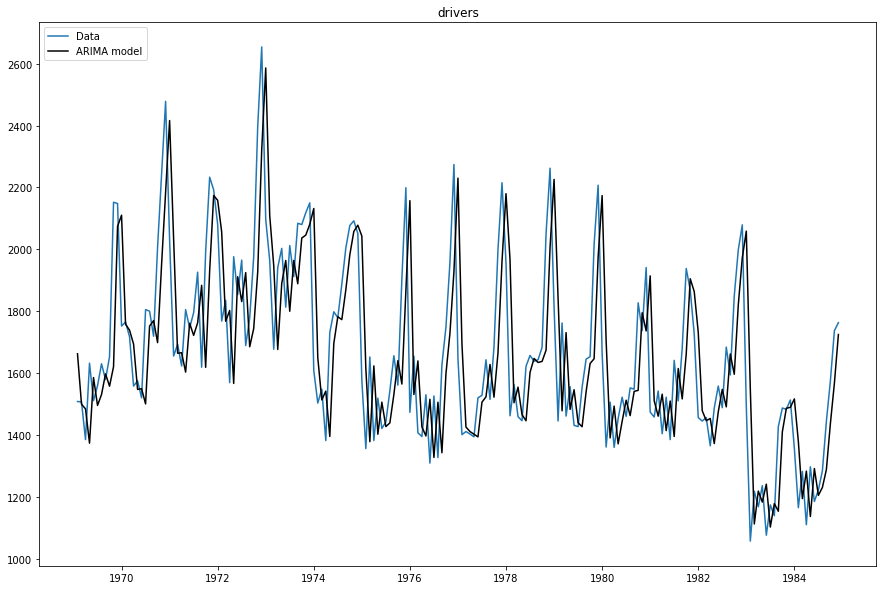

In [10]:
model.plot_fit(figsize=(15, 10))

In [11]:
model = pf.ARIMAX(data=data, formula='drivers~seat_belt+oil_crisis',
                 ar=1, ma=1, family=pf.Normal())
x = model.fit('MLE')
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1297.4978                        
End Date: 1984.91666666667                              AIC: 2606.9955                                    
Number of observations: 191                             BIC: 2626.5092                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9171     0.076      12.0707  0.0      (0.7681 | 1.066)         
MA(1)                                

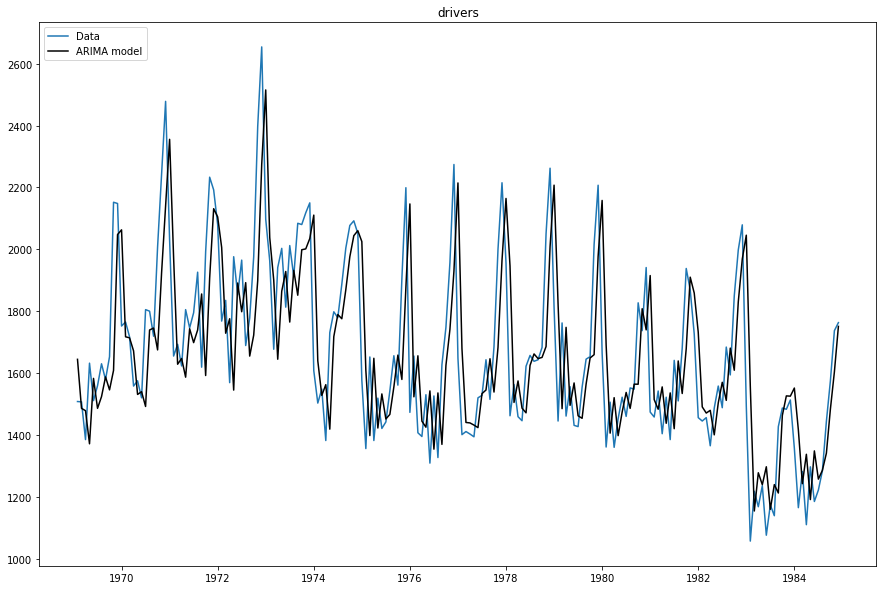

In [12]:
model.plot_fit(figsize=(15, 10))

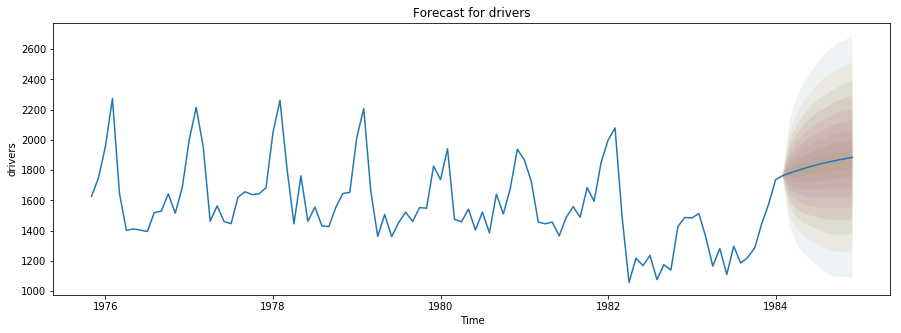

In [13]:
model.plot_predict(h=10, oos_data=data.iloc[-12:], past_values=100, figsize=(15,5))